# **Predicting Credit card approval of an individual**

 **Introduction**:

We are working on a credit card dataset, in which we have information on the individuals such as gender, car owner, property owner, children, etc. This dataset contains 19 columns and 1548 rows. There are 9 numerical variables,2 continuous variables and 8 categorical variables. Based on these factors we need to predict each individual's credit card approvals and check missing values, outliers present or not. We have to deal with this messy data to predict the outcome.

**1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

A.This proposal is very important because approving credit to the right people who have good creditworthiness is very important. Before approving the loans, banks need to know whether they are capable of repaying the loan amount or not. Predicting a good client is essential then they would be able to get back their credit in a specified time along with good interests. So, banks are getting profits through the rotation of money with less risk.

**2.How is it going to impact the banking sector?**

A.This proposal impacts the banking sector so they would be able to choose the right people who can repay the loan sincerely. Banks can easily give credit cards to those with good creditworthiness which leads to better risk management.


**3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

A.The gap in the knowledge is that we need to add one more feature: the CIBIL score which is very important for predicting the approvals. Bankers check the CIBIL score to approve the loans. Most of the applications get rejected due to fewer CIBIL scores. However, the proposed method can be adapted and applied to banks to evaluate good creditworthiness based on some individual factors leading to better risk management and profitability.

In [422]:
import warnings
warnings.filterwarnings('ignore')

In [423]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fancyimpute


In [424]:
#Reading files using pandas
df1=pd.read_csv("/content/Credit_card.csv")
df2=pd.read_csv("/content/Credit_card_label.csv")
df1.head(10)
df1.sample(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1091,5135863,F,N,Y,2,67500.0,Working,Secondary / secondary special,Married,House / apartment,-12226.0,-596,1,0,0,0,Sales staff,4
993,5033418,M,Y,N,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10756.0,-2180,1,0,1,0,Managers,2
589,5028337,F,Y,N,1,225000.0,Working,Higher education,Single / not married,With parents,-13861.0,-5408,1,0,0,0,Laborers,2


**EDA:**

In [425]:
#mergeing two datasets
df3=df1.merge(df2,how='outer')
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [426]:
#To get information of a dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [427]:
#To check the dimensions of a dataset
df3.shape

(1548, 19)

**observation:**
The dataset contains 1548 rows and 19 columns in which ind id, children, employed days,mobile_phone,work_phone, phone, email id, family members, and label columns are discrete variables. Annual income and birth count are continuous variables. Gender, car owner, property owner, type of income, marital status, education, housing type, and type of occupation are categorical variables.

In [428]:
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Length: 1548, dtype: bool

In [429]:
#To check the null values
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

**Observation:**
This dataset contains null values.Gender column contains 7 nullvalues,Annual_income contains 23,birthday_count contains 22 and type_occupation contains 488 nullvalues.

In [430]:
df3["Ind_ID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1543    False
1544    False
1545    False
1546    False
1547    False
Name: Ind_ID, Length: 1548, dtype: bool

In [431]:
df3["Ind_ID"].nunique()

1548

**Observation:** No duplicated values in ind_id column.

In [432]:
#To check statistical values
df3.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


**Observation:** We can see all statical values of the numerical variables such as the count of each variable, mean,standard deviation, min and max values, and quartiles.

**In this dataset, there are some unnecessary columns for prediction such as children, marital status, work phone, phone, and email id.**

In [433]:
#Removing uncessary columns
df3.drop(["CHILDREN","Marital_status","Work_Phone","Phone","EMAIL_ID","Family_Members"],axis=1,inplace=True)
df3.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,Type_Occupation,label
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,1,NaN,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,NaN,-586,1,NaN,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,NaN,1


**Dealing with missing values**

<Axes: >

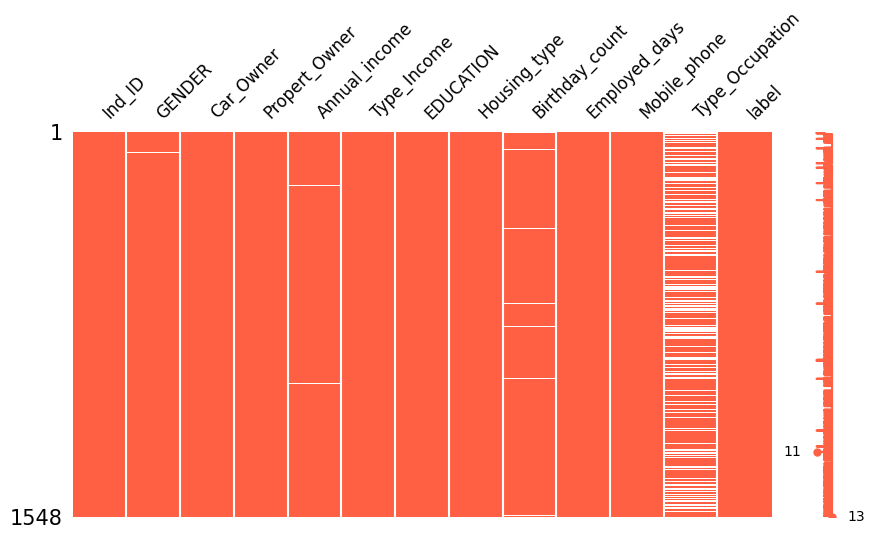

In [434]:
#Checking relation between missingness
import missingno as msno
msno.matrix(df3, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))

**OBSERVATION:**
There is relation between missingness in the variables.Hence,it is MCAR.

<Axes: >

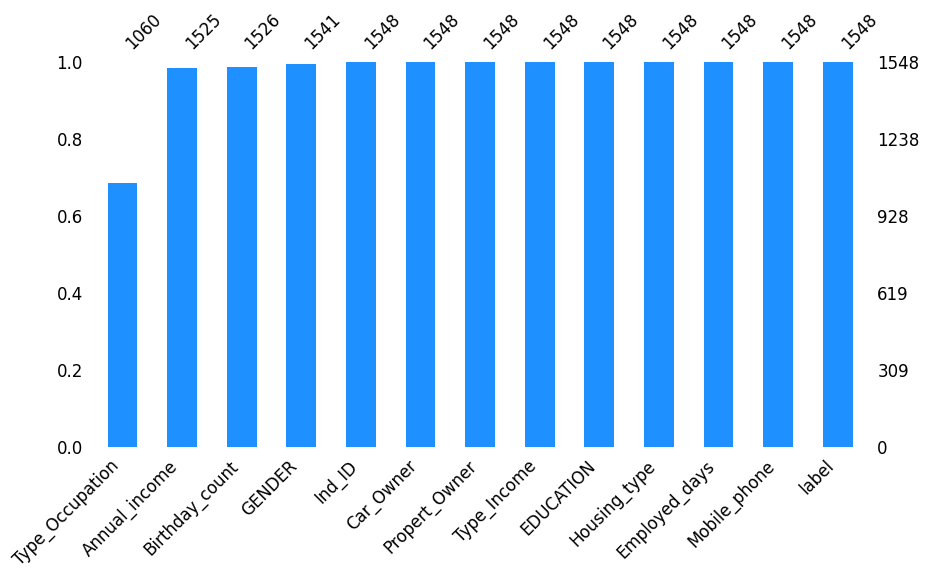

In [435]:
#create bar graph for missing values
msno.bar(df3.sample(1548),color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: >

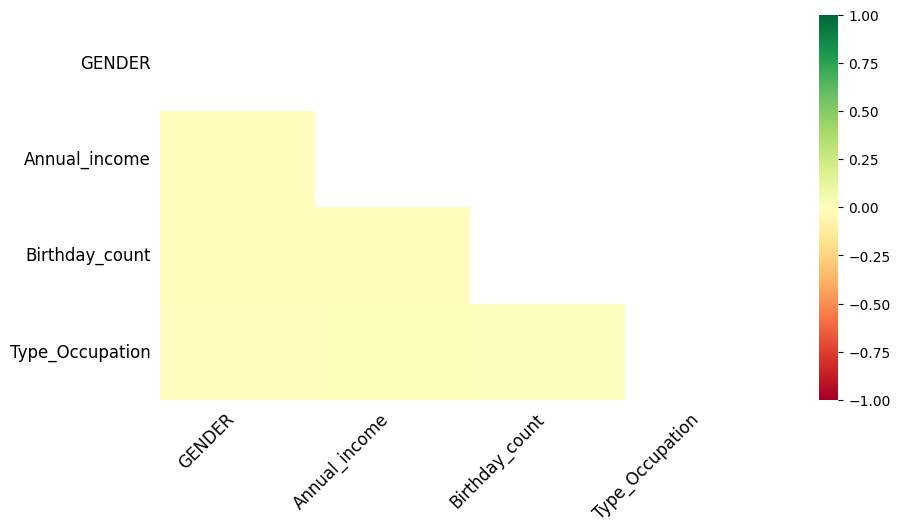

In [436]:
msno.heatmap(df3,cmap="RdYlGn",figsize=(10,5), fontsize=12)

**OBSERVATION:** There is relation between missingness in the variables.Hence,it is MCAR.

In [437]:
df3["Type_Occupation"].isnull().sum()

488

In [438]:
print("percent of missing values in type_occupation:")
percent= (df3["Type_Occupation"].isnull().sum()/df3.shape[0])*100
print(round(percent,2))

percent of missing values in type_occupation:
31.52


**Observation:** column type_occupation contains 31% null values. As per my knowledge, it is a very high amount of null values and this column is not very important for analysis.so I want to drop this column.

In [439]:
#dropping type occupation column
df3.drop(["Type_Occupation"],axis=1,inplace=True)
df3.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,1,1
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,NaN,-586,1,1
3,5009749,F,Y,N,NaN,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,1,1


In [440]:
#checking null values in gender column
df3["GENDER"].isnull().sum()

7

**Observation:**

GENDER is a categorical column containing 7 null values only.



In [441]:
df3.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
Annual_income     23
Type_Income        0
EDUCATION          0
Housing_type       0
Birthday_count    22
Employed_days      0
Mobile_phone       0
label              0
dtype: int64

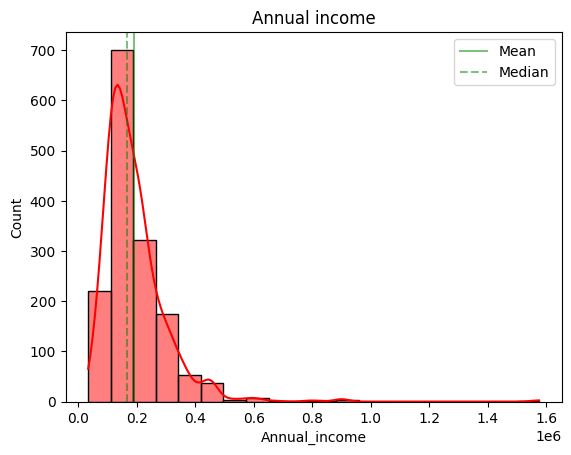

In [442]:
#plotting histogram for Annual income
sns.histplot(data=df3,x="Annual_income",bins=20,kde=True,color="red")
plt.axvline(x=df3.Annual_income.mean(),color='green',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df3.Annual_income.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Annual income")
plt.legend() # adding legend

<Axes: xlabel='Annual_income'>

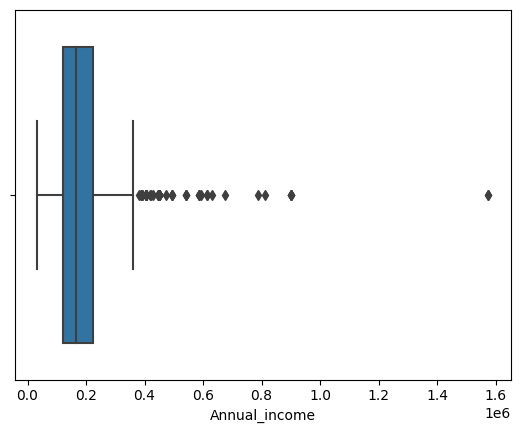

In [443]:
#plotting boxplot to check the outliers and distribution
sns.boxplot(data=df3,x="Annual_income")

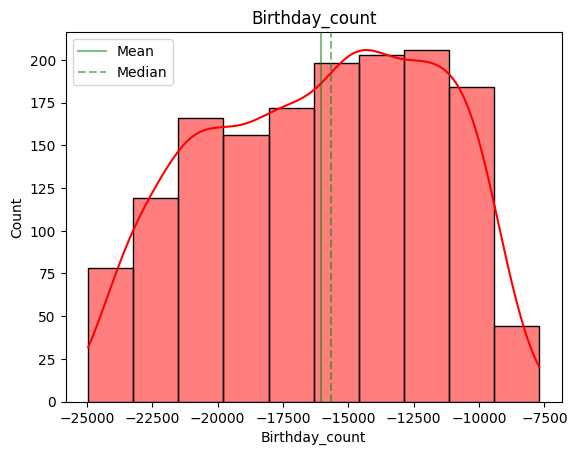

In [444]:
#creating histogram to see the districbution of the birthday count variable
sns.histplot(data=df3,x="Birthday_count",bins=10,kde=True,color="red")
plt.axvline(x=df3.Birthday_count.mean(),color='green',alpha=0.5,label='Mean') # adding vertical line as mean
plt.axvline(x=df3.Birthday_count.median(),c='green',ls='--',alpha=0.5,label='Median') # adding vertical line as median
plt.title("Birthday_count")
plt.legend() # adding legend

**Observation:**

As per the graph, the Annual income column is right-skewed.The number of people with highest Birthday count is between -12500 to -10000 and lowest count is between -10000 to -7500.

In [445]:
#checking correlation between variables
df3.corr()

,Ind_ID,Annual_income,Birthday_count,Employed_days,Mobile_phone,label
Ind_ID,1.000000,0.030147,0.022909,-0.055396,NaN,0.016796
Annual_income,0.030147,1.000000,0.111638,-0.160175,NaN,0.027456
Birthday_count,0.022909,0.111638,1.000000,-0.619039,NaN,-0.045097
Employed_days,-0.055396,-0.160175,-0.619039,1.000000,NaN,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN
label,0.016796,0.027456,-0.045097,0.031408,NaN,1.000000


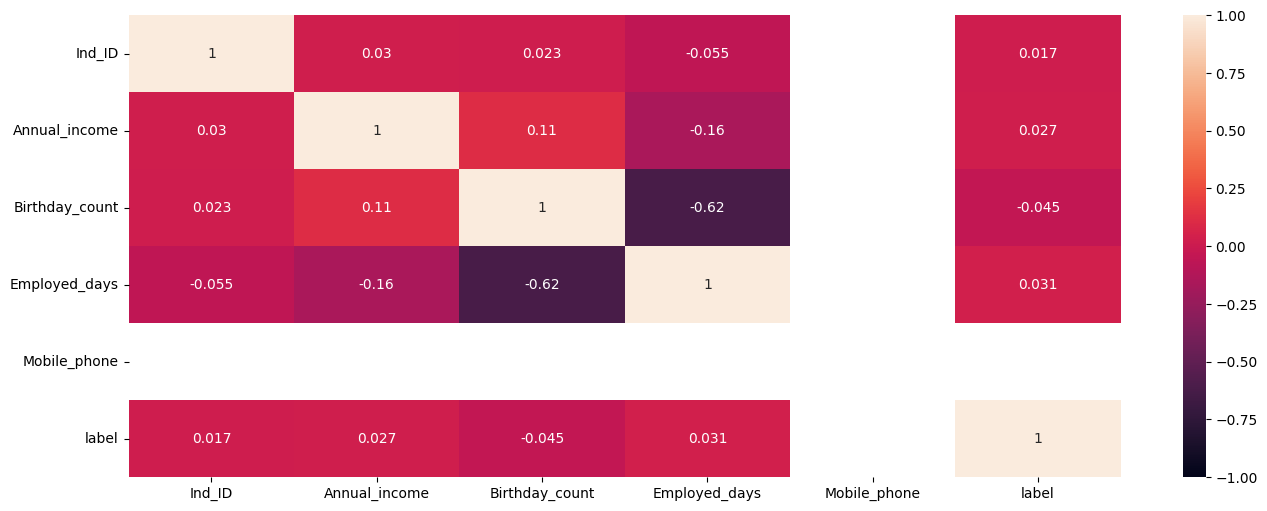

In [446]:
#plotting heatmap to check the relation between the variables
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)

**Obervation:**
Birth count and employed days have a negative linear relationship means if birth count increases, employed days decrease.

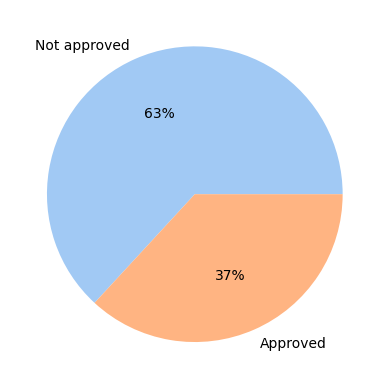

In [447]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df3["GENDER"].value_counts(), labels = ["Not approved","Approved"],
                                        colors = colors, autopct='%.0f%%')
plt.show()

**Oservation:**63% of credit cards are not approved and 37% of credits are approved.

F    973
M    568
Name: GENDER, dtype: int64


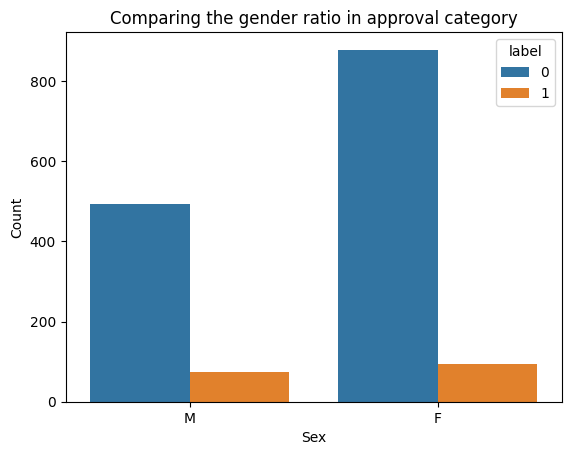

In [448]:
print(df3["GENDER"].value_counts())
sns.countplot(data=df3, x="GENDER", hue="label")
plt.title("Comparing the gender ratio in approval category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Observation:**
Females are applying for credit cards more than males. Female applications are approved more than male applications.

In [449]:
#cheking column names
df3.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Housing_type', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'label'],
      dtype='object')

0    1373
1     175
Name: label, dtype: int64


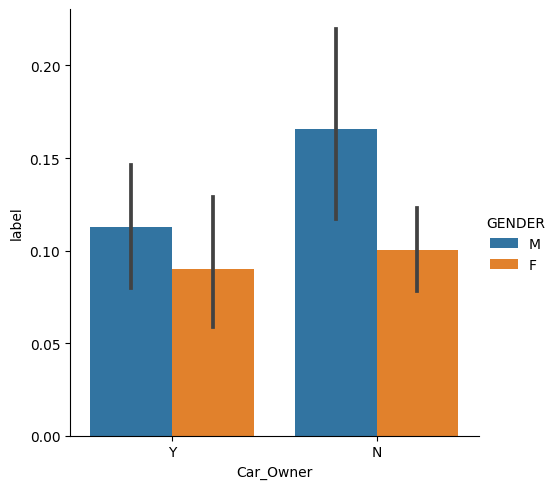

In [450]:
print(df3["label"].value_counts())
sns.catplot(data=df3, x="Car_Owner",y="label",hue="GENDER", kind="bar")

**Observation:** Males own cars more than females. Males without cars got more rejections. Females with cars and without cars got an equal number of rejections and approvals.

0    1373
1     175
Name: label, dtype: int64


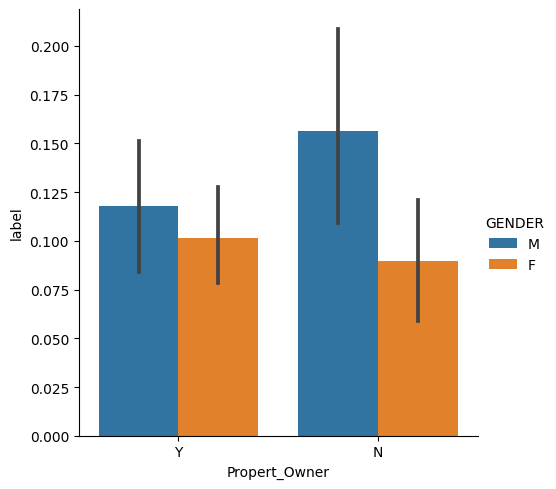

In [451]:
print(df3["label"].value_counts())
sns.catplot(data=df3, x="Propert_Owner",y="label",hue="GENDER", kind="bar")


**Observation:**
Males with no property are higher than females in the dataset.

In [452]:
#importing plotly express sub module
import plotly.express as px
print(df3["GENDER"].value_counts())
#plotting histogram for annual_income of genders
fig = px.histogram(df3,x = 'Annual_income',
                   color = 'GENDER',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Annual_income  over genders')
fig.update_layout(bargap=0.1)
fig.show()

F    973
M    568
Name: GENDER, dtype: int64


**Observation:** The female count is higher than the male and the female count of annual income is also very high.

['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']


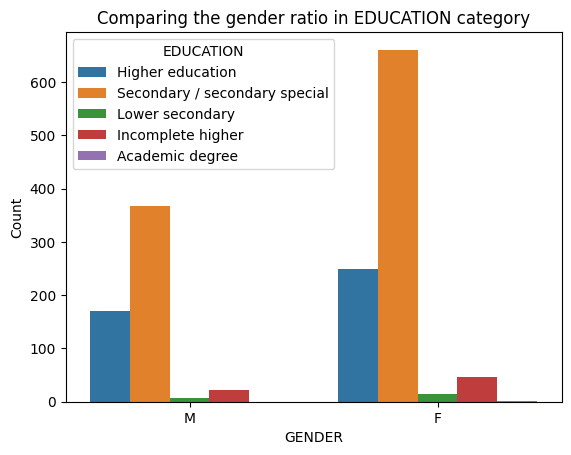

In [453]:
#plotting bar graph genders with their education
print(df3["EDUCATION"].unique())
sns.countplot(data=df3, x="GENDER", hue="EDUCATION")
plt.title("Comparing the gender ratio in EDUCATION category")
plt.xlabel("GENDER")
plt.ylabel("Count")
plt.show()

**Observation:** Females are educated more than males.

In [454]:
#plotting credit card approved over type income
fig = px.histogram(df3,
                  x = "label",
                  marginal = 'box',
                   color="Type_Income",
                  title = "Creditcard approved over type Income ")
fig.update_layout(bargap=0.2)
fig.show()

**Observation:** Working professionals got more approvals and state servants got less number of approvals.

**Imputing missing values**

In [455]:
df3["GENDER"].fillna(df3["GENDER"].mode()[0],inplace=True)
df3["Annual_income"].fillna(df3["Annual_income"].median(),inplace=True)
df3["Birthday_count"].fillna(df3["Birthday_count"].mean(),inplace=True)

In [456]:
df3.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
Annual_income     0
Type_Income       0
EDUCATION         0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
label             0
dtype: int64

In [457]:
df3.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Housing_type', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'label'],
      dtype='object')

In [458]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   Annual_income   1548 non-null   float64
 5   Type_Income     1548 non-null   object 
 6   EDUCATION       1548 non-null   object 
 7   Housing_type    1548 non-null   object 
 8   Birthday_count  1548 non-null   float64
 9   Employed_days   1548 non-null   int64  
 10  Mobile_phone    1548 non-null   int64  
 11  label           1548 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 157.2+ KB


**After applying imputation we have cleaned data.No missing values.**

In [459]:
#to get the unique values of gender column
df3["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [460]:
#to get the unique values of car owner column
df3["Car_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [461]:
##to get the unique values of property owner column
df3["Propert_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [462]:
#to get the unique values of type of income column
df3["Type_Income"].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [463]:
#to get the unique values of education column
df3["EDUCATION"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

**Encoding categorical varibles into numerical variables:**

In [465]:
from sklearn.preprocessing import LabelEncoder
for col in df3:
  le=LabelEncoder()
  if df3[col].dtype=="object":
    df3[col]=le.fit_transform(df3[col])
  # To reverse encoding for a specific column (e.g., column1)
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label
0,5008827,1,1,1,180000.0,1,1,1,-18772.000000,365243,1,1
1,5009744,0,1,0,315000.0,0,1,1,-13557.000000,-586,1,1
2,5009746,0,1,0,315000.0,0,1,1,-16040.342071,-586,1,1
3,5009749,0,1,0,166500.0,0,1,1,-13557.000000,-586,1,1
4,5009752,0,1,0,315000.0,0,1,1,-13557.000000,-586,1,1


**Getting independent features in dataset(X) and dependent feature in series(y)**

In [466]:
x=df3.drop(["label"],axis=1)
print(x.head())
y=df3["label"]
y.head()

    Ind_ID  GENDER  Car_Owner  Propert_Owner  Annual_income  Type_Income  \
0  5008827       1          1              1       180000.0            1   
1  5009744       0          1              0       315000.0            0   
2  5009746       0          1              0       315000.0            0   
3  5009749       0          1              0       166500.0            0   
4  5009752       0          1              0       315000.0            0   

   EDUCATION  Housing_type  Birthday_count  Employed_days  Mobile_phone  
0          1             1   -18772.000000         365243             1  
1          1             1   -13557.000000           -586             1  
2          1             1   -16040.342071           -586             1  
3          1             1   -13557.000000           -586             1  
4          1             1   -13557.000000           -586             1  


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Feature selection and model bulding**

In [467]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.346974
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: label            Pseudo R-squared: 0.017    
Date:               2023-09-06 08:01 AIC:              1096.2324
No. Observations:   1548             BIC:              1155.0243
Df Model:           10               Log-Likelihood:   -537.12  
Df Residuals:       1537             LL-Null:          -546.20  
Converged:          1.0000           LLR p-value:      0.052165 
No. Iterations:     6.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------
Ind_ID           0.0000   0.0000  0.6159 0.5380  -0.0000  0.0000
GENDER           0.4369   0.1819  2.4020 0.0163   0.0804  0.7935
Car_Owner    

In [468]:
significance_level = 0.05

# Get the p-values from the OLS model
p_values = result.pvalues

# Select the features with p-values below the significance level
selected_features = p_values[p_values < significance_level].index

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['GENDER', 'Type_Income'], dtype='object')


**OBSERVATION:** Based on the P-value "Ind_ID", "Car_Owner", "Propert_Owner", "Annual_income", "EDUCATION", "Mobile_phone", "Annual_income_log" are not necessary. we can remove the variables whose p-value is less than 0.05.

In [469]:
#dropping unnessary columns
x=df3.drop(["GENDER","Type_Income"], axis = 1)
x.head()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone,label
0,5008827,1,1,180000.0,1,1,-18772.000000,365243,1,1
1,5009744,1,0,315000.0,1,1,-13557.000000,-586,1,1
2,5009746,1,0,315000.0,1,1,-16040.342071,-586,1,1
3,5009749,1,0,166500.0,1,1,-13557.000000,-586,1,1
4,5009752,1,0,315000.0,1,1,-13557.000000,-586,1,1


**Splitting data into Training and Test data**

In [514]:
x = df3[[ 'Ind_ID' ,'Car_Owner', 'Propert_Owner', 'Annual_income', 'EDUCATION','Housing_type','Birthday_count',
       'Employed_days','Mobile_phone']]
y = df3.label

In [515]:
x.head()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone
0,5008827,1,1,180000.0,1,1,-18772.000000,365243,1
1,5009744,1,0,315000.0,1,1,-13557.000000,-586,1
2,5009746,1,0,315000.0,1,1,-16040.342071,-586,1
3,5009749,1,0,166500.0,1,1,-13557.000000,-586,1
4,5009752,1,0,315000.0,1,1,-13557.000000,-586,1


In [516]:
from sklearn.model_selection import train_test_split # importing train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #20% is test and 80% is training

In [517]:
### both will have same shape
x_train.shape, y_train.shape

((1238, 9), (1238,))

In [518]:
## both will have same shape
x_test.shape, y_test.shape

((310, 9), (310,))

**Standardisation/ feature scaling the dataset
Feature scaling Perform to create same scale for all variables.**

**Hence, all variables will have similar influnece on the model**

In [519]:
#importing libraries to standardlize the variable
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()       #create instance for standardscaler
x_train=ss.fit_transform(x_train)
x_train


array([[-0.81004922, -0.80663912,  0.73340862, ..., -1.22245792,
         2.22501251,  0.        ],
       [ 1.52789473,  1.23971176, -1.36349639, ...,  0.48908829,
        -0.44171404,  0.        ],
       [ 0.83202678,  1.23971176,  0.73340862, ..., -0.22527331,
        -0.43285328,  0.        ],
       ...,
       [-1.36621695,  1.23971176, -1.36349639, ...,  0.70078646,
        -0.43147219,  0.        ],
       [-0.25443206, -0.80663912,  0.73340862, ..., -0.55718923,
        -0.45790184,  0.        ],
       [-0.25407299,  1.23971176,  0.73340862, ...,  1.41778231,
        -0.43356563,  0.        ]])

In [520]:
x_test=ss.fit_transform(x_test)
x_test

array([[-1.20143784, -0.88408664,  0.71567809, ...,  0.95464471,
        -0.46942741,  0.        ],
       [-0.66861309, -0.88408664, -1.39727626, ..., -1.36992404,
         2.20177723,  0.        ],
       [-1.20235529, -0.88408664, -1.39727626, ...,  0.17348692,
        -0.45183418,  0.        ],
       ...,
       [ 1.62273371,  1.13111085,  0.71567809, ...,  1.38618362,
        -0.43635618,  0.        ],
       [-0.38816122, -0.88408664,  0.71567809, ...,  0.37490286,
        -0.46246087,  0.        ],
       [-0.38738863, -0.88408664,  0.71567809, ...,  0.25237288,
        -0.44313502,  0.        ]])

**The problem statement is classification.so here we have to use classification ML models.**

**LOGISTIC REGRESSION:**

In [521]:
#Create a Logistic regression
from sklearn import linear_model
logr=linear_model.LogisticRegression()
#Train the model using the training sets
logr.fit(x_train,y_train)
#Predict the response for test dataset
logr_pred=logr.predict(x_test)
logr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [522]:
#importing metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_mat=confusion_matrix(y_test, logr_pred)   #create object for confusion matrix
print("confusion matrix:")
print(confusion_mat)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, logr_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, logr_pred), 2))
print("Recall score",round(recall_score(y_test, logr_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,logr_pred), 2))              #f1_score using f1_score metric

confusion matrix:
[[280   0]
 [ 30   0]]
Accuracy score 0.9
Precision Score 0.0
Recall score 0.0
f1 score 0.0


**LOG LOSS:**

In [523]:
#checking log loss on test data
from sklearn.metrics import log_loss     #importing log loss
logloss = log_loss(y_test, logr.predict_proba(x_test)) #creating object for log loss
logloss

0.32248343035056654

**Applying different classification ML models to get the high accuracy:**

In [524]:
#importing libraries for random forest,knn classifier,support vector classifier and decision tree.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**DECISION TREE:**

In [525]:
#Create a Decision tree Classifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
#Train the model using the training sets
classifier.fit(x_train, y_train)
#Predict the response for test dataset
y_pred= classifier.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred), 2))
print("Recall score",round(recall_score(y_test, y_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred), 2))              #f1_score using f1_score metric

confusion matrix: [[250  30]
 [ 18  12]]
Accuracy score 0.85
Precision Score 0.29
Recall score 0.4
f1 score 0.33


**RANDOM FOREST CLASSIFIER:**

In [526]:
#Create a Random forest Classifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
#Train the model using the training sets
classifier.fit(x_train, y_train)
#Predict the response for test dataset
y_pred1= classifier.predict(x_test)
cm= confusion_matrix(y_test, y_pred1)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred1), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred1), 2))
print("Recall score",round(recall_score(y_test, y_pred1), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred1), 2))



confusion matrix:
[[278   2]
 [ 29   1]]
Accuracy score 0.9
Precision Score 0.33
Recall score 0.03
f1 score 0.06


**KNC MODEL:**

In [527]:
#Create a KNN Classifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
#Train the model using the training sets
classifier.fit(x_train, y_train)
#Predict the response for test dataset
y_pred2= classifier.predict(x_test)
cm= confusion_matrix(y_test, y_pred2)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred2), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred2), 2))
print("Recall score",round(recall_score(y_test, y_pred2), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred2), 2))


confusion matrix:
[[271   9]
 [ 23   7]]
Accuracy score 0.9
Precision Score 0.44
Recall score 0.23
f1 score 0.3


**SVC MODEL:**

In [528]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred3 = clf.predict(x_test)
cm= confusion_matrix(y_test, y_pred3)
print("confusion matrix:")
print(cm)
### accuracy using accuracy_score
print("Accuracy score",round(accuracy_score(y_test, y_pred3), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred3), 2))
print("Recall score",round(recall_score(y_test, y_pred3), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred3), 2))


confusion matrix:
[[280   0]
 [ 30   0]]
Accuracy score 0.9
Precision Score 0.0
Recall score 0.0
f1 score 0.0


In [529]:
#for comparing accuracy of models
models = [linear_model.LogisticRegression(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

for i in range(5):                 #to iterate through models
    models[i].fit(x_train, y_train)          #fitting the model to train dataset

    print(f'{models[i]} : ')
    pred_train = models[i].predict(x_train)        #predicting model for train data
    print('Accuracy for train data: ', round(accuracy_score(y_train,pred_train ),2))    #calculating accuracy score for train data

    pred_val = models[i].predict(x_test)

    print('Accuracy for test data: ', round(accuracy_score(y_test, pred_val),2))
    print()

LogisticRegression() : 
Accuracy for train data:  0.88
Accuracy for test data:  0.9

RandomForestClassifier() : 
Accuracy for train data:  1.0
Accuracy for test data:  0.9

SVC() : 
Accuracy for train data:  0.88
Accuracy for test data:  0.9

KNeighborsClassifier() : 
Accuracy for train data:  0.89
Accuracy for test data:  0.9

DecisionTreeClassifier() : 
Accuracy for train data:  1.0
Accuracy for test data:  0.86



**Observation:We can say KNC and Random Forest models have high accuracy among all the models.**

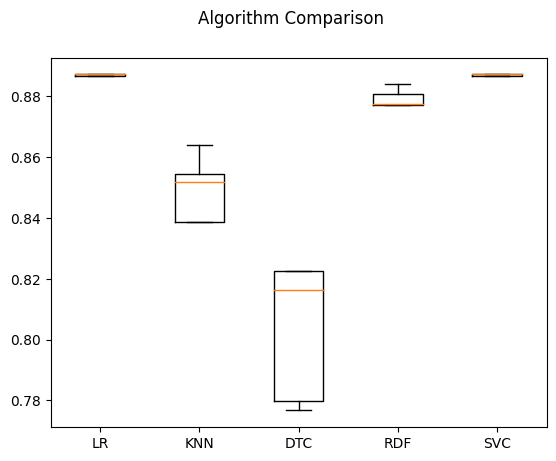

In [530]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', linear_model.LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('SVC', SVC()))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
 cv_results = model_selection.cross_val_score(model, x, y, scoring=scoring)
 results.append(cv_results)
 names.append(name)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [531]:
# Calculating auc score for KNC model
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)
auc

0.6005952380952382

**Plotting AUC for KNC model**

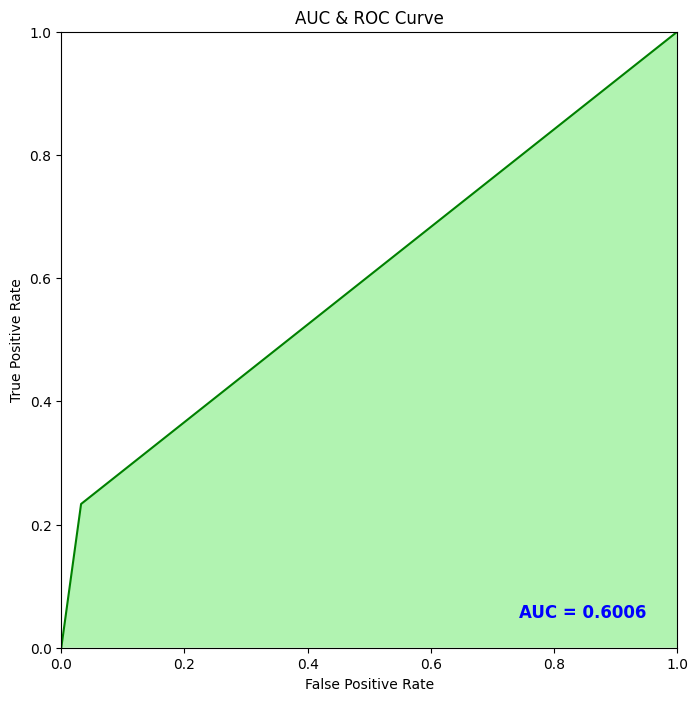

In [532]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Predicting credit card approval based on input data by using KNC model.**

In [533]:
x.head()

,Ind_ID,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Housing_type,Birthday_count,Employed_days,Mobile_phone
0,5008827,1,1,180000.0,1,1,-18772.000000,365243,1
1,5009744,1,0,315000.0,1,1,-13557.000000,-586,1
2,5009746,1,0,315000.0,1,1,-16040.342071,-586,1
3,5009749,1,0,166500.0,1,1,-13557.000000,-586,1
4,5009752,1,0,315000.0,1,1,-13557.000000,-586,1


In [542]:
new_input=[[5009865,0,1,135665.000167,1,1,-12445.000000,-600,0]]
classifier1= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier1.fit(x_train, y_train)
new_pred1= classifier1.predict(new_input)
print(new_pred1)
if new_pred1==1:
  print("Not approved")
else: print("approved")

[0]
approved
